In [1]:
import numpy as np

import keras

from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.utils.np_utils import to_categorical

from PIL import Image

Using TensorFlow backend.


In [2]:
#carrega o banco de dados do mnist

(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [3]:
#xTrain
len(xTrain)
#xTrain.shape
#yTrain
#yTrain.shape

60000

In [4]:
#One-hot encoding

yTreino = to_categorical(yTrain)
yTreino

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
#visualizando exemplo de imagem

data = xTrain[0]
img = Image.fromarray(data, 'L') #'L' para imagem em escala de cinza (8-bit)

img

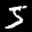

In [19]:
w, h = 32,32
img = img.resize((w,h), Image.ANTIALIAS)
img

a = np.asarray(img)

img = Image.fromarray(a, 'L') #'L' para imagem em escala de cinza (8-bit)
img

In [27]:
#ajuste das dimensões das imagens de treino

w, h = 32, 32

auxList = []

for i in range(len(xTrain)):
    
    img = Image.fromarray(xTrain[i], 'L') #'L' para imagem em escala de cinza (8-bit)

    img = img.resize((w,h), Image.ANTIALIAS)
    
    auxList.append(np.asarray(img))

xTreino = np.array(auxList)        
xTreino.shape

oi


(60000, 32, 32)

In [32]:
#ajuste das dimensões das imagens de teste

w, h = 32, 32

auxList = []

for i in range(len(xTest)):
    
    img = Image.fromarray(xTest[i], 'L') #'L' para imagem em escala de cinza (8-bit)

    img = img.resize((w,h), Image.ANTIALIAS)

    auxList.append(np.asarray(img))

xTeste = np.array(auxList)
xTeste.shape

(10000, 32, 32)

(32, 32)


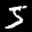

In [36]:
#visualizando exemplo de imagem

data = xTreino[0]
img = Image.fromarray(data, 'L') #'L' para imagem em escala de cinza (8-bit)

print(data.shape)
img

In [9]:
def leNet():
    
    classificador = Sequential()
    
    #imagem 32x32
    #Camada convolucional 1
    classificador.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1)))
    
    #imagem 28x28
    #Camada de pooling 1
    classificador.add(MaxPooling2D(pool_size = 2, strides = 2))
    
    #imagem 14x14
    #Camada convolucional 2
    classificador.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (14,14,6)))
    
    #imagem 10x10
    #Camada de pooling 2
    classificador.add(MaxPooling2D(pool_size = 2, strides = 2))
    
    #imagem 5x5
    #Flatten
    classificador.add(Flatten())
    
    #Camada totalmente conectada 1
    classificador.add(Dense(units = 120, activation = 'relu'))
    
    #Camada totalmente conectada 2
    classificador.add(Dense(units = 84, activation = 'relu'))
    
    #Camada de saída
    classificador.add(Dense(units = 10, activation = 'softmax'))
    
    classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return  classificador